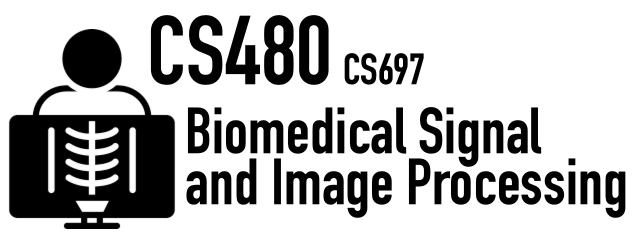
# Assignment 1


In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [24]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

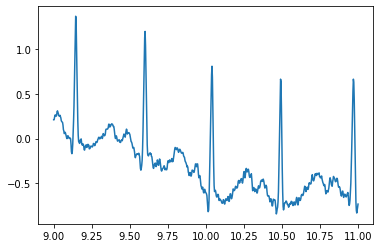

In [25]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

RANGE_START = 9
RANGE_END = 11

time = np.linspace(RANGE_START, RANGE_END, SAMPLING_RATE * (RANGE_END - RANGE_START))
data = ecg[SAMPLING_RATE * RANGE_START:SAMPLING_RATE * RANGE_END]
plot = plt.plot(time, data)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [26]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [27]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [28]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [29]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


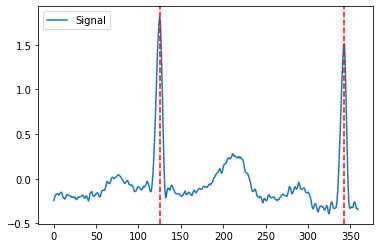

In [30]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

{'ECG_R_Peaks': array([   125,    343,    552,    748,    944,   1130,   1317,   1501,
          1691,   1880,   2065,   2251,   2431,   2608,   2779,   2956,
          3125,   3292,   3456,   3614,   3776,   3948,   4129,   4310,
          4482,   4652,   4812,   4984,   5157,   5323,   5496,   5674,
          5856,   6048,   6250,   6454,   6663,   6865,   7055,   7245,
          7423,   7608,   7797,   7975,   8173,   8375,   8583,   8789,
          8987,   9177,   9372,   9567,   9751,   9936,  10112,  10306,
         10512,  10708,  10907,  11103,  11287,  11472,  11658,  11845,
         12037,  12221,  12404,  12601,  12804,  13004,  13207,  13402,
         13606,  13810,  14012,  14222,  14408,  14611,  14825,  15038,
         15258,  15678,  15877,  16074,  16274,  16476,  16662,  16865,
         17049,  17302,  17515,  17691,  17909,  18099,  18289,  18479,
         18666,  18856,  19065,  19281,  19505,  19696,  19853,  20154,
         20356,  20560,  20759,  20955,  21115,  

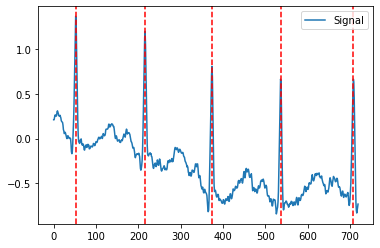

In [31]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

EXTEND = SAMPLING_RATE * 1 # extended range for peak detection
_, rpeaks2 = nk.ecg_peaks(ecg[SAMPLING_RATE * 9 - EXTEND:SAMPLING_RATE * 11 + EXTEND],
                         sampling_rate=SAMPLING_RATE)

# recenter peaks to align with the data interval 
peaks = [p - EXTEND for p in rpeaks2['ECG_R_Peaks']
          if EXTEND <= p <= SAMPLING_RATE * 2 + EXTEND]

plot = nk.events_plot(peaks, data)
rpeaks

**Task 3:** Detect Heartrate. [15 Points]

In [32]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

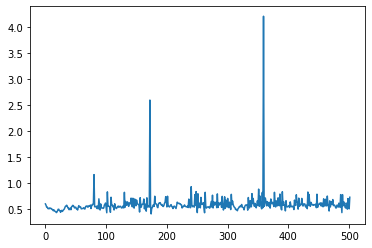

In [33]:
diffs = np.diff(rpeaks['ECG_R_Peaks']) * 1/SAMPLING_RATE
# print(diffs)
plot = plt.plot(diffs)

The heartbeat is mostly regular at first, but it gets irregular and has several points where it stops for several seconds. This is definitely not a regular heartbeat.

**Task 4:** Detect P Q S T Peaks. [25 Points]

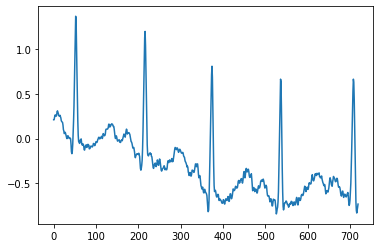

In [39]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

data = ecg[SAMPLING_RATE * 9:SAMPLING_RATE * 11]
_, waves_peak = nk.ecg_delineate(data, peaks, SAMPLING_RATE)
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], data)

In [35]:
# TODO Does the detection work well?
# Yes, it seems to be detecting the waves fine. We can see some irregularity between different peaks

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

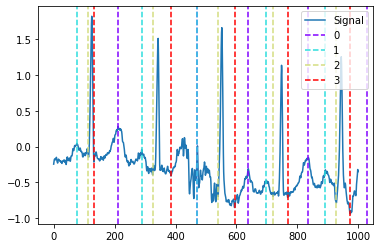

In [36]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

_, waves_peak = nk.ecg_delineate(ecg, rpeaks, SAMPLING_RATE)
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg[:1000])


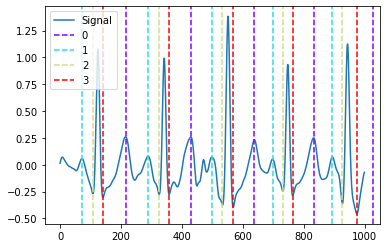

In [78]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.


lowfilt = nk.signal_filter(ecg, SAMPLING_RATE, lowcut=2.5, highcut=17)
_, waves_peak = nk.ecg_delineate(lowfilt, rpeaks, SAMPLING_RATE)
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], lowfilt[:1000])


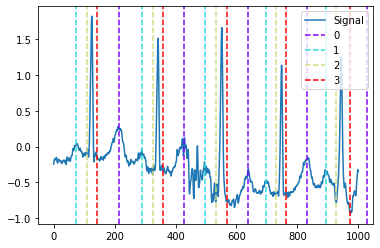

In [80]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg[:1000])

In [ ]:
# TODO Does the filtering improve the result?

# The filtered result is a lot cleaner with less noise and large variation. It's
# definitely easier to see the cycles, and the peaks detected seem to line up
# with the original data. The part that sees most improvement is the fuzzy
# bit around 500 samples: in the analysis on the original data it seems to just
# pick one of the spikes as the P peak, while it seems like the filtered signal
# places it where I would probably put it based on naked-eye observation.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#